# Advanced Data Science Capstone Project


## Hasthag categorization through NLP


## Objective:


### The final deliverable of this model is to categorize hashtags read from twitter and instagram into categories ( politics, sports, Local affairs, Invoirnment, beauty etc) using NLP algorithms

### Importing initial libraries 

In [1]:
import numpy as np
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Input
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns 
import matplotlib.pyplot as plt  
!pip install wordcloud
!pip install wordcloud-fa


Using TensorFlow backend.


     |████████████████████████████████| 368kB 16.5MB/s eta 0:00:01
     |████████████████████████████████| 81kB 4.8MB/s eta 0:00:011
     |████████████████████████████████| 317kB 21.5MB/s eta 0:00:01
     |████████████████████████████████| 1.4MB 33.2MB/s eta 0:00:01
     |████████████████████████████████| 235kB 47.5MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/c9/32/c8/d928635a6118f294b50c6ef55c7fd7e16bc5f83ca44d9e7175
  Stored in directory: /home/dsxuser/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
  Stored in directory: /home/dsxuser/.cache/pip/wheels/66/15/54/4510dce8bb958b1cdd2c47425cbd1e1eecc0480ac9bb1fb9ab
Successfully built wordcloud-fa nltk libwapiti
  Found existing installation: nltk 3.4
    Uninstalling nltk-3.4:
      Successfully uninstalled nltk-3.4


### Extracting files

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ff90416a647f4edcb452cb18e7e7b4e7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DvyayH2zKeQxkQQijXtziBw7xHg_G4KkkbkFIN6AEyip',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ff90416a647f4edcb452cb18e7e7b4e7.get_object(Bucket='ads4capstoneproject-donotdelete-pr-fpi0wexefp23vb',Key='hashtags_train.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train1 = pd.read_excel(body)
train1.head()


,Name,Category,Label,Tweet Volume,Url,Tweet1,Tweet2,Tweet3,Tweet4,Tweet5,Tweet6,Tweet7,Tweet8,Tweet9,Tweet10,Country1,Country2,Country3,Country4,Country5
0,#Absolutely,11,0,319922,http://twitter.com/search?q=Absolutely,RT @joncoopertweets: Coming as a surprise to a...,RT @Stuart_McDonald: Just absolutely disgustin...,RT @nizzaregalado: the worst part about LDRs i...,RT @JuddLegum: 4. The reach of this Ukrainian ...,RT @shambhav15: Whatever the hell you think of...,RT @notshayn: my crush doing absolutely nothin...,Is digital health in an investment bubble? Abs...,@milwaukeemauler Absolutely! He was in everyth...,Folk are allowed to be upset about missing the...,RT @YourMateJez: The biggest myth in England r...,Palestinian Territories,Qatar,Oman,Iraq,NaN
1,#Arab,15,1,46283,http://twitter.com/search?q=arab,RT @printpuncakalam: دعم الحسابات الراقية فقط....,Si no pudísteis asistir a la jornada informati...,"RT @TWICETrends: TWICE ""Feel Special"" M/V TEAS...",RT @ThornThornhill: Israel voters kick Netanya...,RT @printpuncakalam: CC Arab: Quality Print &a...,RT @ThornThornhill: Israel voters kick Netanya...,RT @1milcoupe: I’m gonna date a Turkish girl t...,RT @AlArabiya: نيويورك بوست: الشيء الذي ينبغي ...,بلاغ رسمي يتهم &amp;#8221;الجزيرة&amp;#8220; ا...,RT @JFXM: Big news breaking from Israel. The J...,Qatar,Bahrain,Jordan,Palestinian Territories,NaN
2,#Palestinians,11,1,29757,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...,"RT @wavesandnumb3rs: Collectively, across Pale...",#BDS #Gaza #Palestinians #HumanRights #Palesti...,RT @ShehabAgencyEn: From the clashes that brok...,RT @NetworkCanada: VIDEO: Today members of Dis...,"RT @JVoiceLabour: ""In Area C Israeli authoriti...",@jamalblogs @NickKristof @monaeltahawy @Martin...,@shahadwest @UBAsleep Yessss and us Palestinia...,@ItmakesSNS tries to address following anti-Mu...,"RT @abierkhatib: It’s 2019, 72 years since the...",Jordan,Palestinian Territories,Iraq,NaN,NaN
3,#Middle East,11,0,34837,http://twitter.com/search?q=%22Middle+East%22,RT @afzaque: Thomas Cook began leading tour gr...,RT @takeshisakuragi: 2012年10月、アレッポの病院を訪れたとき、途切...,RT @davidfrawleyved: India through @narendramo...,RT @BoxingLifeLong: @nina14p @boxersforlife Cl...,RT @Scr0dman: @american4117 @Diffdrum1 @MSNBC ...,Times of Middle East: Apple Function Liveblog:...,@IDF Ah ah ah here’s an idea...\nhttps://t.co/...,"Even though DP World and the UAE faced off, an...",RT @davidfrawleyved: India through @narendramo...,Watch #Refinitiv's latest Oil Market update an...,Qatar,Palestinian Territories,Jordan,NaN,NaN
4,#Technology,4,0,16613,http://twitter.com/search?q=%23technology,RT @rashtrapatibhvn: The gap between governmen...,RT @AndroidAuth: Huawei clarifies it has “no p...,RT @TW_TradeShow: IMT\nTaiwan’s professional e...,RT @missingpeople: In the age of technology wh...,ADT AS WELL AS PROTEC SYSTEM WITH BLOOD TRACE ...,RT @nizzaregalado: the worst part about LDRs i...,RT @realjimdandie: @DonnaWR8 @ConcernedHigh I ...,RT @ITNewsAfrica: Cisco and SingularityNET set...,Guys it was auto correct...these technology th...,RT @rashtrapatibhvn: The gap between governmen...,Palestinian Territories,United Arab Emirates,NaN,NaN,NaN


In [3]:

body = client_ff90416a647f4edcb452cb18e7e7b4e7.get_object(Bucket='ads4capstoneproject-donotdelete-pr-fpi0wexefp23vb',Key='hashtags_test.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test1 = pd.read_excel(body)
test1.head()


,Name,Category,Label,Tweet Volume,Url,Tweet1,Tweet2,Tweet3,Tweet4,Tweet5,Tweet6,Tweet7,Tweet8,Tweet9,Tweet10,Country1,Country2,Country3,Country4,Country5
0,#UhOhitsGIDLE,1,0,88803,http://twitter.com/search?q=%23UhOhitsGIDLE,@JoonHeartBeat The fact that the tweet is from...,"@yebinlvr Dreamcatcher the end of nightmare, g...",She didn't even show discrimination and prejud...,The fact that y'all were calling soyeon racist...,RT @yebinlvr: ok im gonna do another ga as a t...,#HappyBirthday to #gidle #yuqi ! The #brightes...,If the said the n word then I'd understand but...,@gidlefriend Ur so damn lucky. I want them to ...,@namgischiId Fr i have screenshots on my ig n ...,RT @GIDLEChartData: 📣 Today is @G_I_DLE’s firs...,Saudi Arabia,NaN,NaN,NaN,NaN
1,#MyLeaderRahulGandhi,14,0,16996,http://twitter.com/search?q=%23MyLeaderRahulGa...,@h_s_Karthik @srinivasiyc @RahulGandhi #MyLead...,"RT @devender_babli: तप, त्याग और बलिदान भट्टी ...",RT @LMLido: @MTulikaa @srinivasiyc @GoSlowplz ...,@srinivasiyc @RahulGandhi #MyLeaderRahulGandhi...,RT @h_s_Karthik: @srinivasiyc @RahulGandhi #My...,RT @h_s_Karthik: While the current @BJP4India ...,@GEORGE52107460 @harmony1960 @Shehla_Rashid #M...,RT @h_s_Karthik: @srinivasiyc @RahulGandhi #My...,@MTulikaa @srinivasiyc @GoSlowplz @RahulGandhi...,@MoeedNj @GVS_News #NotMyPM #EVMSarkar \n\n#M...,Qatar,NaN,NaN,NaN,NaN
2,#WorldDrugDay,15,0,21881,http://twitter.com/search?q=%23WorldDrugDay,RT @PrabhuL30391179: #WorldDrugDay\nमानवता को ...,"RT @AntiDrugRwanda: Nitwa Mpakaniye Ismael, 23...",#WorldDrugDay\nमानवता को पूर्ण रूप से नशीले पद...,RT @devender_babli: स्वस्थ और मजबूत समाज की सं...,"RT @AntiDrugRwanda: I am Odette Nabonibo, one ...",RT @PoonamBhan2: #WorldDrugDay\nमानवता को पूर्...,RT @PoonamBhan2: #WorldDrugDay\nमानवता को पूर्...,#WorldDrugDay\nमानवता को पूर्ण रूप से नशीले पद...,RT @AntiDrugRwanda: My names are Hervé Dushimy...,RT @AntiDrugRwanda: I'm called UMWALI Gemima a...,Qatar,NaN,NaN,NaN,NaN
3,#BRINGTHESOUL_THEMOVIE,6,0,409092,http://twitter.com/search?q=%23BRINGTHESOUL_TH...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,RT @ForeverpurpleV: I can’t wait anymore 💜💜💜#B...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,ขายโปสการ์ด 100฿ รวมส่งลทบค่า อันนี้ที่ได้จากห...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,RT @WeLoveSF: ดูหนังจบ⚠️ เก็บตั๋วไว้ให้ดี #BRI...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,RT @shopshopnumber1: #พร้อมส่ง *หายาก* 🌈BTS ME...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,Qatar,NaN,NaN,NaN,NaN
4,#MuellerTime,7,0,12040,http://twitter.com/search?q=%23MuellerTime,Arrest them all. No mercy. #ImpeachTheMF #Trum...,RT @RealJamesWoods: #MuellerTime... https://t....,RT @RealJamesWoods: #MuellerTime... https://t....,#PutinsPuppet Arrest them all. No mercy. #Impe...,@PatriotMadd @realDonaldTrump @JoeBiden @Donal...,@MittRomney If TRUMP was accused of what Biden...,RT @RealJamesWoods: #MuellerTime... https://t....,RT @RealJamesWoods: #MuellerTime... https://t....,RT @RealJamesWoods: #MuellerTime... https://t....,@wesgeorgia951 @davidfrum The only thing missi...,Qatar,NaN,NaN,NaN,NaN


### Browsing the data and its parameters

In [4]:
train1["Category"].value_counts()

11    35
15    24
13    16
8      6
9      4
5      4
3      3
14     2
6      2
10     1
4      1
1      1
Name: Category, dtype: int64

In [5]:
test1["Category"].value_counts()

15    9
9     6
13    5
14    3
11    3
8     3
12    1
7     1
6     1
1     1
Name: Category, dtype: int64

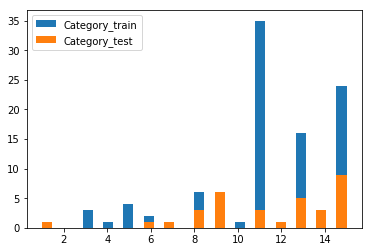

In [6]:
Category_train = train1['Category']#.str.len() 
Category_test = test1['Category']#.str.len() 
plt.hist(Category_train, bins=30, label="Category_train") 
plt.hist(Category_test, bins=30, label="Category_test") 
plt.legend() 
plt.show()

In [7]:
comb = train1.append(test1, ignore_index=True) 
comb.shape
comb.head()

,Name,Category,Label,Tweet Volume,Url,Tweet1,Tweet2,Tweet3,Tweet4,Tweet5,Tweet6,Tweet7,Tweet8,Tweet9,Tweet10,Country1,Country2,Country3,Country4,Country5
0,#Absolutely,11,0,319922,http://twitter.com/search?q=Absolutely,RT @joncoopertweets: Coming as a surprise to a...,RT @Stuart_McDonald: Just absolutely disgustin...,RT @nizzaregalado: the worst part about LDRs i...,RT @JuddLegum: 4. The reach of this Ukrainian ...,RT @shambhav15: Whatever the hell you think of...,RT @notshayn: my crush doing absolutely nothin...,Is digital health in an investment bubble? Abs...,@milwaukeemauler Absolutely! He was in everyth...,Folk are allowed to be upset about missing the...,RT @YourMateJez: The biggest myth in England r...,Palestinian Territories,Qatar,Oman,Iraq,NaN
1,#Arab,15,1,46283,http://twitter.com/search?q=arab,RT @printpuncakalam: دعم الحسابات الراقية فقط....,Si no pudísteis asistir a la jornada informati...,"RT @TWICETrends: TWICE ""Feel Special"" M/V TEAS...",RT @ThornThornhill: Israel voters kick Netanya...,RT @printpuncakalam: CC Arab: Quality Print &a...,RT @ThornThornhill: Israel voters kick Netanya...,RT @1milcoupe: I’m gonna date a Turkish girl t...,RT @AlArabiya: نيويورك بوست: الشيء الذي ينبغي ...,بلاغ رسمي يتهم &amp;#8221;الجزيرة&amp;#8220; ا...,RT @JFXM: Big news breaking from Israel. The J...,Qatar,Bahrain,Jordan,Palestinian Territories,NaN
2,#Palestinians,11,1,29757,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...,"RT @wavesandnumb3rs: Collectively, across Pale...",#BDS #Gaza #Palestinians #HumanRights #Palesti...,RT @ShehabAgencyEn: From the clashes that brok...,RT @NetworkCanada: VIDEO: Today members of Dis...,"RT @JVoiceLabour: ""In Area C Israeli authoriti...",@jamalblogs @NickKristof @monaeltahawy @Martin...,@shahadwest @UBAsleep Yessss and us Palestinia...,@ItmakesSNS tries to address following anti-Mu...,"RT @abierkhatib: It’s 2019, 72 years since the...",Jordan,Palestinian Territories,Iraq,NaN,NaN
3,#Middle East,11,0,34837,http://twitter.com/search?q=%22Middle+East%22,RT @afzaque: Thomas Cook began leading tour gr...,RT @takeshisakuragi: 2012年10月、アレッポの病院を訪れたとき、途切...,RT @davidfrawleyved: India through @narendramo...,RT @BoxingLifeLong: @nina14p @boxersforlife Cl...,RT @Scr0dman: @american4117 @Diffdrum1 @MSNBC ...,Times of Middle East: Apple Function Liveblog:...,@IDF Ah ah ah here’s an idea...\nhttps://t.co/...,"Even though DP World and the UAE faced off, an...",RT @davidfrawleyved: India through @narendramo...,Watch #Refinitiv's latest Oil Market update an...,Qatar,Palestinian Territories,Jordan,NaN,NaN
4,#Technology,4,0,16613,http://twitter.com/search?q=%23technology,RT @rashtrapatibhvn: The gap between governmen...,RT @AndroidAuth: Huawei clarifies it has “no p...,RT @TW_TradeShow: IMT\nTaiwan’s professional e...,RT @missingpeople: In the age of technology wh...,ADT AS WELL AS PROTEC SYSTEM WITH BLOOD TRACE ...,RT @nizzaregalado: the worst part about LDRs i...,RT @realjimdandie: @DonnaWR8 @ConcernedHigh I ...,RT @ITNewsAfrica: Cisco and SingularityNET set...,Guys it was auto correct...these technology th...,RT @rashtrapatibhvn: The gap between governmen...,Palestinian Territories,United Arab Emirates,NaN,NaN,NaN


### Rearranging the dataframe, by creating rows for each of the tweets  (Tweet1 ~ Tweet10) and removing the Countries columns

In [297]:
test_combi1 = comb
test_combi1 = test_combi1.drop(["Tweet Volume","Country1","Country2","Country3","Country4","Country5"], axis =1)
d = dict(Tweet=test_combi1.filter(regex="^Tweet").columns)
test = pd.lreshape(test_combi1, d)
test.head()

,Category,Label,Name,Url,Tweet
0,11,0,#Absolutely,http://twitter.com/search?q=Absolutely,RT @joncoopertweets: Coming as a surprise to a...
1,15,1,#Arab,http://twitter.com/search?q=arab,RT @printpuncakalam: دعم الحسابات الراقية فقط....
2,11,1,#Palestinians,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...
3,11,0,#Middle East,http://twitter.com/search?q=%22Middle+East%22,RT @afzaque: Thomas Cook began leading tour gr...
4,4,0,#Technology,http://twitter.com/search?q=%23technology,RT @rashtrapatibhvn: The gap between governmen...


In [298]:
combi = test
combi.head()

,Category,Label,Name,Url,Tweet
0,11,0,#Absolutely,http://twitter.com/search?q=Absolutely,RT @joncoopertweets: Coming as a surprise to a...
1,15,1,#Arab,http://twitter.com/search?q=arab,RT @printpuncakalam: دعم الحسابات الراقية فقط....
2,11,1,#Palestinians,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...
3,11,0,#Middle East,http://twitter.com/search?q=%22Middle+East%22,RT @afzaque: Thomas Cook began leading tour gr...
4,4,0,#Technology,http://twitter.com/search?q=%23technology,RT @rashtrapatibhvn: The gap between governmen...


### Cleansing the data

In [299]:
#Defining Function to remove patterns like "#"
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [300]:
#Removing Handlers
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['Tweet'], "@[\w]*") 
combi.head()

,Category,Label,Name,Url,Tweet,tidy_tweet
0,11,0,#Absolutely,http://twitter.com/search?q=Absolutely,RT @joncoopertweets: Coming as a surprise to a...,RT : Coming as a surprise to absolutely nobody...
1,15,1,#Arab,http://twitter.com/search?q=arab,RT @printpuncakalam: دعم الحسابات الراقية فقط....,RT : دعم الحسابات الراقية فقط..ادب~ذوق~اخلاق \...
2,11,1,#Palestinians,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...,RT : 🇵🇸#Palestine : About 25 Palestinians were...
3,11,0,#Middle East,http://twitter.com/search?q=%22Middle+East%22,RT @afzaque: Thomas Cook began leading tour gr...,RT : Thomas Cook began leading tour groups to ...
4,4,0,#Technology,http://twitter.com/search?q=%23technology,RT @rashtrapatibhvn: The gap between governmen...,RT : The gap between government and people mus...


In [301]:
#Removing Punctuations, Numbers, and Special Characters
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z\u0621-\u064A#]", " ")
#combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[http\S+|www.\S+]"," ") #r'^https?:\/\/.*[\r\n]*
#combi['tidy_tweet'] = combi['tidy_tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("http\S+|www.\S+", " ") 
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("RT", " ") 
combi.head()


,Category,Label,Name,Url,Tweet,tidy_tweet
0,11,0,#Absolutely,http://twitter.com/search?q=Absolutely,RT @joncoopertweets: Coming as a surprise to a...,Coming as a surprise to absolutely nobody ...
1,15,1,#Arab,http://twitter.com/search?q=arab,RT @printpuncakalam: دعم الحسابات الراقية فقط....,دعم الحسابات الراقية فقط ادب ذوق اخلاق ...
2,11,1,#Palestinians,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...,#Palestine About Palestinians were ...
3,11,0,#Middle East,http://twitter.com/search?q=%22Middle+East%22,RT @afzaque: Thomas Cook began leading tour gr...,Thomas Cook began leading tour groups to E...
4,4,0,#Technology,http://twitter.com/search?q=%23technology,RT @rashtrapatibhvn: The gap between governmen...,The gap between government and people must...


In [302]:
# Creating New Column for Arabic tweets
combi['tidy_tweet_ar'] = combi['tidy_tweet'].str.replace("[^\u0621-\u064A#]", " ")
#combi['tidy_tweet_ar'] = combi['tidy_tweet_ar'].str.replace("#", " ")
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head()

,Category,Label,Name,Url,Tweet,tidy_tweet,tidy_tweet_ar
0,11,0,#Absolutely,http://twitter.com/search?q=Absolutely,RT @joncoopertweets: Coming as a surprise to a...,Coming as a surprise to absolutely nobody ...,...
1,15,1,#Arab,http://twitter.com/search?q=arab,RT @printpuncakalam: دعم الحسابات الراقية فقط....,...,دعم الحسابات الراقية فقط ادب ذوق اخلاق ...
2,11,1,#Palestinians,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...,#Palestine About Palestinians were ...,# ...
3,11,0,#Middle East,http://twitter.com/search?q=%22Middle+East%22,RT @afzaque: Thomas Cook began leading tour gr...,Thomas Cook began leading tour groups to E...,...
4,4,0,#Technology,http://twitter.com/search?q=%23technology,RT @rashtrapatibhvn: The gap between governmen...,The gap between government and people must...,...


In [303]:
#Removing short words (less than 3 characters)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi['tidy_tweet'].head()

0    Coming surprise absolutely nobody Donald Trump...
1                                                     
2    #Palestine About Palestinians were kidnapped I...
3    Thomas Cook began leading tour groups Egypt Ho...
4    between government people must must make best ...
Name: tidy_tweet, dtype: object

In [304]:
# tokenizing
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())  
tokenized_tweet_ar = combi['tidy_tweet_ar'].apply(lambda x: x.split())
tokenized_tweet.head()
tokenized_tweet1 = tokenized_tweet

In [305]:
!pip install pyarabic
# Special thanks to: misc{zerrouki2012pyarabic, title={pyarabic, An Arabic language library for Python}, author={Zerrouki, Taha},url={https://pypi.python.org/pypi/pyarabic,year={2010}}

In [306]:
import pyarabic.araby as araby
import pyarabic.number as number

### Stemming Tweets

In [286]:
# stemming arabic and english
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import * 
from nltk.stem.isri import ISRIStemmer 
#stemmer_en = PorterStemmer() 
#tokenized_tweet1 = tokenized_tweet.apply(lambda x: [stemmer_en.stem(i) for i in x]) 
#tokenized_tweet.head()
stemmer_eng = nltk.stem.SnowballStemmer('english') 
tokenized_tweet1 = tokenized_tweet1.apply(lambda x: [stemmer_eng.stem(i) for i in x]) 
print(tokenized_tweet1.head())
stemmer_ar = ISRIStemmer() 
tokenized_tweet_ar = tokenized_tweet_ar.apply(lambda x: [stemmer_ar.stem(i) for i in x])
#tokenized_tweet_ar.head(10)


0    [come, surpri, absolut, nobodi, donald, trump,...
1                                                   []
2    [#palestin, about, palestinian, were, kidnap, ...
3    [thoma, cook, began, lead, tour, group, egypt,...
4    [between, govern, peopl, must, must, make, bes...
Name: tidy_tweet, dtype: object


In [263]:
#stitching English tweets text of it together back again
for i in range(len(tokenized_tweet1)):
    tokenized_tweet1[i] = ' '.join(tokenized_tweet1[i])    
combi['tidy_tweet'] = tokenized_tweet1
combi.head()

,Category,Label,Name,Url,Tweet,tidy_tweet,tidy_tweet_ar
0,11,0,#Absolutely,http://twitter.com/search?q=Absolutely,RT @joncoopertweets: Coming as a surprise to a...,come surpri absolut nobodi donald trump person...,...
1,15,1,#Arab,http://twitter.com/search?q=arab,RT @printpuncakalam: دعم الحسابات الراقية فقط....,,دعم الحسابات الراقية فقط ادب ذوق اخلاق ...
2,11,1,#Palestinians,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...,#palestin about palestinian were kidnap isra o...,# ...
3,11,0,#Middle East,http://twitter.com/search?q=%22Middle+East%22,RT @afzaque: Thomas Cook began leading tour gr...,thoma cook began lead tour group egypt holi la...,...
4,4,0,#Technology,http://twitter.com/search?q=%23technology,RT @rashtrapatibhvn: The gap between governmen...,between govern peopl must must make best techn...,...


In [264]:
msk = np.random.rand(len(combi)) < 0.7
train = combi[msk]
test = combi[~msk]
print(train.shape)
print(test.shape)

(919, 7)
(401, 7)


### Visualizing WordCloud

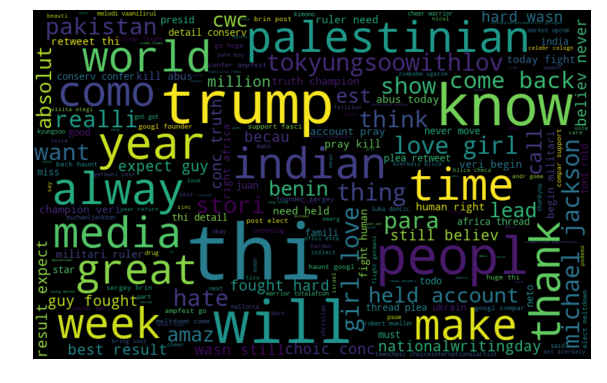

In [265]:
#Vislualising English Tweets

all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud 
Wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(Wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [266]:
from wordcloud_fa import WordCloudFa

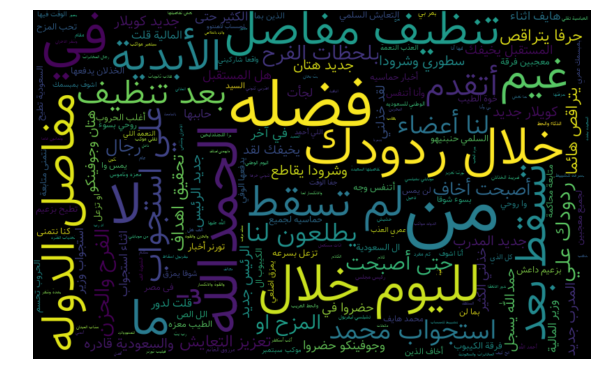

In [307]:
# Visualising Arabic WordCloud
all_words = ' '.join([text for text in combi['tidy_tweet_ar']]) 
all_words

Wordcloud_ar = WordCloudFa(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(Wordcloud_ar, interpolation="bilinear") 
plt.axis('off') 
plt.show()


In [268]:
def hashtag_extract(x):    
    hashtags = []    # Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags

In [269]:
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['Label'] == 0])
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['Label'] == 1])


In [270]:
#unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])


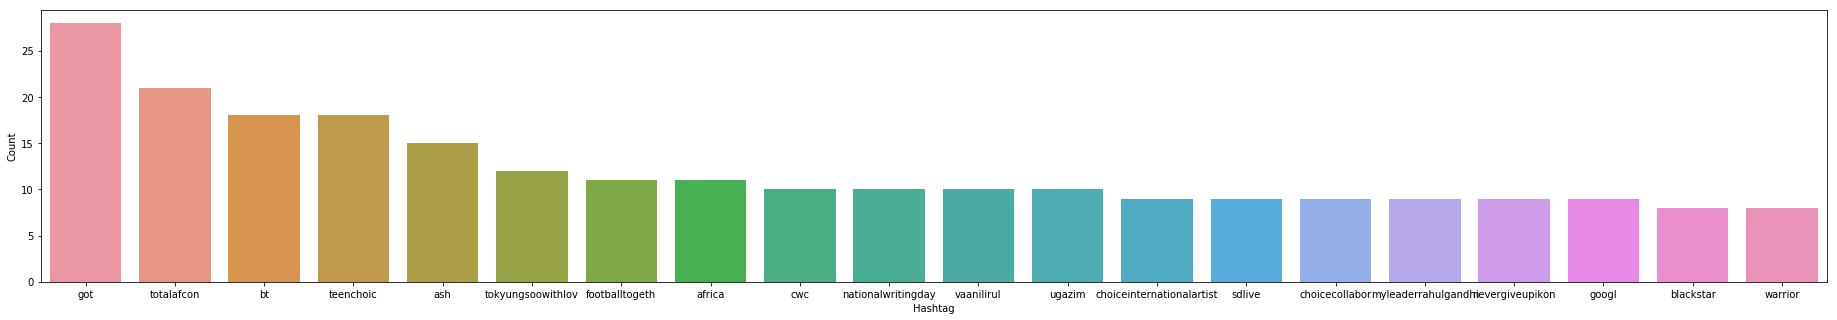

In [271]:
#Visualising Hashtags with regular sentiment (non-racist/sexist)
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(32,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

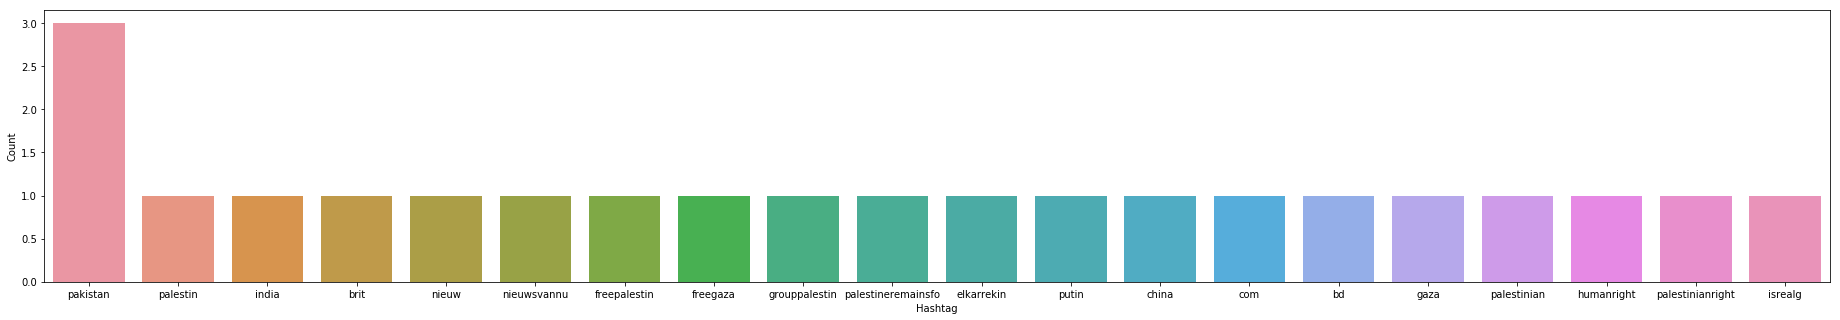

In [272]:
#Visualising Hashtags with negative sentiment (racist/sexist)
b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags 
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(32,5)) 
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
plt.show()

In [273]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
!pip install gensim
import gensim

### Creating Bag of Words

In [310]:
#start with the english (Bag-of-Words) Features
bow_vectorizer_en = CountVectorizer(max_features=1000)#, stop_words='english') max_df=0.3, min_df=1, 
bow_en = bow_vectorizer_en.fit_transform(combi['tidy_tweet']) 
print(bow_en.shape)
#start with the arabic (Bag-of-Words) Features
bow_vectorizer_ar = CountVectorizer(max_df=0.90, min_df=2, max_features=1000) #, stop_words='english') 
bow_ar = bow_vectorizer_ar.fit_transform(combi['tidy_tweet_ar']) 
print(bow_ar.shape)

(1320, 1000)
(1320, 607)


### Creating TF-IDF Features

In [311]:
#TF-IDF features- english
tfidf_vectorizer_en = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf_en = tfidf_vectorizer_en.fit_transform(combi['tidy_tweet']) 
print(tfidf_en.shape)
#TF-IDF features- arabic
tfidf_vectorizer_ar = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000)#, stop_words='english') 
tfidf_ar = tfidf_vectorizer_ar.fit_transform(combi['tidy_tweet_ar']) 
print(tfidf_ar.shape)

(1320, 1000)
(1320, 607)


### Wor2Vec Embedding

In [314]:
#Word2Vec Embeddings en
tokenized_tweet1 = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v_en = gensim.models.Word2Vec(
            tokenized_tweet1,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

In [315]:
#Word2Vec Embeddings
tokenized_tweet_ar = combi['tidy_tweet_ar'].apply(lambda x: x.split()) # tokenizing 
model_w2v_ar = gensim.models.Word2Vec(
            tokenized_tweet_ar,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

In [316]:
model_w2v_en.train(tokenized_tweet1, total_examples= len(combi['tidy_tweet']), epochs=20)

(117606, 188580)

In [317]:
model_w2v_ar.train(tokenized_tweet_ar, total_examples= len(combi['tidy_tweet_ar']), epochs=20)

(60677, 105580)

In [318]:
#model Vector English
def word_vector_en(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v_en[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary continue
            if count != 0:
                vec /= count
    return vec

In [319]:
#model Vector Arabic
def word_vector_ar(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v_ar[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary continue
            if count != 0:
                vec /= count
    return vec

In [320]:
wordvec_arrays_en = np.zeros((len(tokenized_tweet1), 200)) 
for i in range(len(tokenized_tweet1)):
    wordvec_arrays_en[i,:] = word_vector_en(tokenized_tweet1[i], 200)
    wordvec_df_en = pd.DataFrame(wordvec_arrays_en) 
wordvec_df_en.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


(1320, 200)

In [321]:
wordvec_arrays_ar = np.zeros((len(tokenized_tweet_ar), 200)) 
for i in range(len(tokenized_tweet_ar)):
    wordvec_arrays_ar[i,:] = word_vector_ar(tokenized_tweet_ar[i], 200)
    wordvec_df_ar = pd.DataFrame(wordvec_arrays_ar) 
wordvec_df_ar.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


(1320, 200)

In [322]:
#Doc2Vec Embedding
from tqdm import tqdm
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

In [323]:
#function to labelise or tag each tokenised tweet with unique IDs in order to implement Doc2Vec
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [324]:
labeled_tweets_en = add_label(tokenized_tweet1) # label all the tweets
labeled_tweets_en[:6]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).


[LabeledSentence(words=['Coming', 'surprise', 'absolutely', 'nobody', 'Donald', 'Trump', 'personal', 'driver', 'years', 'suing', 'Trump', 'Organization'], tags=['tweet_0']),
 LabeledSentence(words=[], tags=['tweet_1']),
 LabeledSentence(words=['#Palestine', 'About', 'Palestinians', 'were', 'kidnapped', 'Israeli', 'occupation', 'forces', 'during', 'night', 'raids', 'Issawiya', 'village'], tags=['tweet_2']),
 LabeledSentence(words=['Thomas', 'Cook', 'began', 'leading', 'tour', 'groups', 'Egypt', 'Holy', 'Land', 'years', 'even', 'present', 'opening'], tags=['tweet_3']),
 LabeledSentence(words=['between', 'government', 'people', 'must', 'must', 'make', 'best', 'technology', 'foster', 'good', 'governance'], tags=['tweet_4']),
 LabeledSentence(words=['Balakot', 'reactivated', '#Pakistan', 'terrorists', 'waiting', 'enter', '#India', 'Army', 'Chief', 'THIS', 'ABSOLUTE', 'NONSENSE', 'VkwSvqF'], tags=['tweet_5'])]

In [325]:
labeled_tweets_ar = add_label(tokenized_tweet_ar)
labeled_tweets_ar[:6]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).


[LabeledSentence(words=[], tags=['tweet_0']),
 LabeledSentence(words=['دعم', 'الحسابات', 'الراقية', 'فقط', 'ادب', 'ذوق', 'اخلاق'], tags=['tweet_1']),
 LabeledSentence(words=['#'], tags=['tweet_2']),
 LabeledSentence(words=[], tags=['tweet_3']),
 LabeledSentence(words=[], tags=['tweet_4']),
 LabeledSentence(words=['#', '#'], tags=['tweet_5'])]

In [326]:
#Train doc2vec english
model_d2v_en = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
dm_mean=1, # dm = 1 for using mean of the context word vectors                                  
size=200, # no. of desired features                                  
window=5, # width of the context window                                  
negative=7, # if > 0 then negative sampling will be used                                 
min_count=5, # Ignores all words with total frequency lower than 2.
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 23) 
model_d2v_en.build_vocab([i for i in tqdm(labeled_tweets_en)])
model_d2v_en.train(labeled_tweets_en, total_examples= len(combi['tidy_tweet']), epochs=15)

/opt/conda/envs/Python36/lib/python3.6/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 1320/1320 [00:00<00:00, 619016.24it/s]


In [327]:
docvec_arrays_en = np.zeros((len(tokenized_tweet1), 200)) 
for i in range(len(combi)):
    docvec_arrays_en[i,:] = model_d2v_en.docvecs[i].reshape((1,200))    

docvec_df_en = pd.DataFrame(docvec_arrays_en) 
docvec_df_en.shape

(1320, 200)

In [328]:
#Train doc2vec arabic
model_d2v_ar = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
dm_mean=1, # dm = 1 for using mean of the context word vectors                                  
size=200, # no. of desired features                                  
window=5, # width of the context window                                  
negative=7, # if > 0 then negative sampling will be used                                 
min_count=5, # Ignores all words with total frequency lower than 2.
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 23) 
model_d2v_ar.build_vocab([i for i in tqdm(labeled_tweets_ar)])
model_d2v_ar.train(labeled_tweets_ar, total_examples= len(combi['tidy_tweet_ar']), epochs=15)

/opt/conda/envs/Python36/lib/python3.6/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 1320/1320 [00:00<00:00, 424023.99it/s]


In [329]:
docvec_arrays_ar = np.zeros((len(tokenized_tweet_ar), 200)) 
for i in range(len(combi)):
    docvec_arrays_ar[i,:] = model_d2v_ar.docvecs[i].reshape((1,200))    

docvec_df_ar = pd.DataFrame(docvec_arrays_ar) 
docvec_df_ar.shape

(1320, 200)

In [330]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [331]:
print('shape of Train set is:', train.shape)
print('shape of Test set is:', test.shape)
print('shape of BOW set is:', bow_en.shape)


shape of Train set is: (919, 7)
shape of Test set is: (1320, 7)
shape of BOW set is: (1320, 1000)


In [332]:
# Extracting train and test BoW features 

train_bow_en = bow_en[:919,:]
test_bow_en = bow_en[919:,:]
# splitting data into training and validation set 
xtrain_bow_en, xvalid_bow_en, ytrain_en, yvalid_en = train_test_split(train_bow_en, train['Label'], random_state=13, test_size=0.3)
lreg_en = LogisticRegression() 
# training the model 
lreg_en.fit(xtrain_bow_en, ytrain_en) 
prediction_en = lreg_en.predict_proba(xvalid_bow_en) # predicting on the validation set 
prediction_int_en = prediction_en[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int_en = prediction_int_en.astype(np.int) 
f1_score(yvalid_en, prediction_int_en) # calculating f1 score for the validation set

0.041666666666666664

In [280]:
train_tfidf_en = tfidf_en[:919,:] 
test_tfidf_en = tfidf_en[919:,:] 
xtrain_tfidf = train_tfidf_en[ytrain_en.index] 
xvalid_tfidf = train_tfidf_en[yvalid_en.index]
lreg_en.fit(xtrain_tfidf, ytrain_en) 
prediction = lreg_en.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid_en, prediction_int) # calculating f1 score for the validation set

IndexError: index (1318) out of range

In [56]:
train_w2v = wordvec_df_en.iloc[:1054,:] 
test_w2v = wordvec_df_en.iloc[1054:,:] 
xtrain_w2v = train_w2v.iloc[ytrain_en.index,:] 
xvalid_w2v = train_w2v.iloc[yvalid_en.index,:]
lreg_en.fit(xtrain_w2v, ytrain_en) 
prediction = lreg_en.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid_en, prediction_int)

IndexError: positional indexers are out-of-bounds

In [60]:
train_d2v = docvec_df_en.iloc[:1054,:] 
test_d2v = docvec_df_en.iloc[1054:,:] 
xtrain_d2v = train_d2v.iloc[ytrain_en.index,:] 
xvalid_d2v = train_d2v.iloc[yvalid_en.index,:]
lreg_en.fit(xtrain_d2v, ytrain_en) 
prediction = lreg_en.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid_en, prediction_int)

IndexError: positional indexers are out-of-bounds

In [61]:
from xgboost import XGBClassifier

In [62]:
xgb_model_en = XGBClassifier(max_depth=2, n_estimators=1000).fit(xtrain_bow_en, ytrain_en) 
prediction_en = xgb_model_en.predict(xvalid_bow_en) 
f1_score(yvalid_en, prediction_en)

0.039999999999999994